## Instalación de librerías


In [ ]:
import subprocess
import sys

# Lista de paquetes necesarios
paquetes = [
    "numpy",
    "matplotlib",
    "pandas",
    "scipy",
    "uncertainties",
]


# Función para instalar paquetes condicionalmente
def instalar_paquete(paquete):
    try:
        __import__(paquete)
        print(f"✅ El paquete '{paquete}' ya está instalado.")
    except ImportError:
        print(f"⚠️ El paquete '{paquete}' no está instalado. Instalando...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])
        print(f"✅ Paquete '{paquete}' instalado con éxito.")


# Instalar cada paquete de la lista
for paquete in paquetes:
    instalar_paquete(paquete)

In [ ]:
# Previo toca importar paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import BSpline as Bspline
from scipy.interpolate import splrep
from scipy.optimize import root_scalar
import uncertainties as unc
import uncertainties.unumpy as unp
from uncertainties import ufloat


def plot_template(title, x_label, y_label, x_lim=None, y_lim=None):
    """Genera la plantilla para mantener consistencia en el formato
    de cada tabla generada.

    Args:
        title (string): Aplica titulos.
        x_label (float): Título de eje x.
        y_label (float): Título de eje y.
        x_lim ([float], optional): Límite en eje x. Defaults to None.
        y_lim ([float], optional): Límite en eje y. Defaults to None.

    Returns:
        object: Devuelve los objetos de la gráfica modificados con la
        plantilla requerida
    """
    fig, ax = plt.subplots(  # Tamaño de la figura en pulgadas (ancho, alto)
        figsize=(10, 6)
    )

    # Configuración de rótulos y unidades
    ax.set_title(title, fontsize=18)  # Título con tamaño de fuente
    ax.set_xlabel(x_label, fontsize=16)  # Eje x con rótulo y unidades
    ax.set_ylabel(y_label, fontsize=16)  # Eje y con rótulo y unidades

    # Configuración de la escala y las dimensiones
    if x_lim is not None:
        ax.set_xlim(x_lim)  # Limitar el eje x
    if y_lim is not None:
        ax.set_ylim(y_lim)  # Limitar el eje y

    ax.grid(True, which="both", linestyle="--", alpha=0.7)  # Añadir una cuadrícula

    fig.tight_layout()  # Ajusta los elementos para que no se solapen

    return (  # Devolver las figuras y ejes para más modificaciones si es necesario
        fig,
        ax,
    )


# test
if False:
    x = np.linspace(0, 10, 100)
    fig, ax = plot_template("This is a test", "X label", "Y label", [0, 10], [-1, 1])
    ax.scatter(x, [np.sin(i) for i in x], marker="+", color="red")

# Práctica #2: Formación de Imagenes

_Andrés Felipe Pinzón y Cristian Camilo Pérez_

Universidad Nacional de Colombia

Departamento de Física y Matemáticas


## Tabla de Contenidos

- [Introducción](#Introducción)
- [Modelación Teórica](#modelacion_teorica)
- [Metodología](#metodologia)
- [Análisis y Resultados](#analisis_y_resultados)
- [Conclusiones](#conclusiones)
- [Referencias](#referencias)


## Introducción


En esta práctica experimental, se explora el comportamiento de las lentes negativas, comportamiento de la lente positiva en su imagen virtual y como una lupa. A diferencia de las lentes positivas, que convergen los rayos de luz para formar imágenes reales, las lentes negativas divergen los rayos de luz, lo que resulta en la formación de imágenes virtuales. Este comportamiento de las lentes negativas resulta en una dificultad para caracterizar los parámetros del mismo

En este laboratorio, se construyó un montaje que permite medir la distancia focal $f_-$ de una lente negativa utilizando una lente positiva auxiliar con foco conocido $f_a$, como también encontrar el foco de un sistema de una lente positiva $f_+$ cuando se forma una imagen virtual usando nuevamente una lente positiva auxiliar. Por ultimo se analiza el aumento $m$ producido por una lente positiva cuando se usa como _lupa_.


## Modelación teórica


### Lente divergente


Para determinar la distancia focal $f_-$ de una lente negativa empleando una lente positiva auxiliar de distancia focal conocida $f_+$, se considera un sistema de dos lentes separadas por una distancia $d$.

Para esto usaremos ecuaciones de la generales de la óptica geométrica como **Ley de Gauss**:

$$
\frac{1}{f} = \frac{1}{s_i} - \frac{1}{s_o}
$$

<!-- Además, al combinar una lente negativa con una positiva, es posible determinar la distancia focal de la lente negativa empleando una lente positiva de distancia focal conocida. El sistema de dos lentes permite la formación de imágenes intermedias que sirven como objetos para la segunda lente, facilitando así el análisis y la medición precisa de las distancias focales involucradas. -->

Y la ecuación de **aumento transversal**:

$$
m_t = \frac{h_i}{h_o} = \frac{s_i}{s_o}
$$


### Sistema de Dos Lentes

Haciendo uso de la representación con Geogebra de un sistema de dos lentes (negativa-positiva), realizada por David Matellano:


In [93]:
from IPython.display import IFrame

# URL del recurso de GeoGebra
geogebra_url = "https://www.geogebra.org/classic/m7gnccjz"

# Incrustar el applet en el cuaderno
IFrame(src=geogebra_url, width=1000, height=700)

Utilizaremos la ecuación de Gauss para determinar el sistema compuesto. Primero se indican las ecuaciones básicas.
**Primera Lente (Negativa):**

$$
\frac{1}{f_-} = \frac{1}{s_{i_-}} - \frac{1}{s_o}
$$

Donde:

- $s_o$: Distancia del objeto a la lente negativa.
- $s_{i_-}$: Distancia de la imagen formada por la lente negativa.

**Segunda Lente (Positiva):**

$$
\frac{1}{f_+} = \frac{1}{s_{i_+}} - \frac{1}{s_{o_+}}
$$

Donde:

- $s_{o_+} = -d + s_{i_-}$: Distancia del objeto para la lente positiva (imagen de la lente negativa).
- $s_{i_+}$: Distancia de la imagen final del sistema.

Despejando $s_{i_-} = d + s_{o_+}$ y sustituyendo $s_{i_-}$ en la ecuación de la primera lente:

$$
\frac{1}{f_-} = \frac{1}{d + s_{o_+}} - \frac{1}{s_o}
$$

Despejando $s_{o_+}$ de la segunda ecuación:

$$
s_{o_+} = \frac{f_+ s_{i_{+}}}{-s_{i_+} + f_+}
$$

Sustituyendo $s_{i_-}$ en la ecuación de la primera lente:

$$
\frac{1}{f_-} = \frac{1}{d + \left(\frac{f_+ s_{i_{+}}}{-s_{i_+} + f_+}\right)} - \frac{1}{s_o}
$$


### Linealización para Regresión


Reorganizando las ecuaciones para obtener una relación lineal entre $\frac{1}{s_{i_+}}$ y $\frac{1}{s_o}$:

$$
\begin{align}
\frac{1}{s_{o}} &= \frac{1}{d +\left(\frac{f_+ s_{i_{+}}}{-s_{i_+} + f_+}\right)} - \frac{1}{f_-} \\
&= \frac{-s_{i_+}+f_+}{d (f_+-s_{i_+})+f s_{i_+}}-\frac{1}{{f_-}}
\end{align}
$$

Luego se obtiene la relación lineal:

$$
y = \frac{1}{s_{o}} \quad \text{vs.} \quad x = \frac{f_+ - s_{i_+}}{d (f_+-s_{i_+})+f s_{i_+}}
$$

entonces:

$$
m = 1  \quad \text{y} \quad b = -\frac{1}{f_-}
$$

Esta relación permite realizar una regresión lineal con los datos experimentales de $s_o$ y $s_{i_+}$ para determinar $f_-$. Si además se cambia $f_-$ por $f_+'$,donde $f_+'$ es la distancia focal de la lente positiva que genera la imagen virtual, se puede determinar la distancia focal de la lente positiva $f_+'$, como se vio en el anterior sistema.


La _lupa_ es el instrumento óptico más simple, basado en una lente positiva donde se ubica el objeto en el rango entre el foco primario y la lente para tener una imagen virtual, en la misma orientación y aumentada un factor de $m X$ veces, y además cumple las mismas características que los anteriores lentes delgados.

La lupa busca que la amplificación $M$ sea máxima, el límite está impuesto por la _distancia de punto cercano_ (250 mm) donde el ojo puede enfocar de la manera más cercana posible un objeto. La ecuación que describe el comportamiento de la amplificación

$$M = \frac{25}{-s_i + d}\left( \frac{s_i}{f} + 1 \right)$$

Siendo $d$ la distancia al ojo acomodado. Si deseamos que se tenga sin acomodación, es decir, que los rayos de la lente de la lupa sean paralelos, se requiere que el objeto se encuentre en el foco directamente de la lente y para el mayor aumento, el ojo al objeto virtual a la distancia de punto cercano $dpc = 25.0 \, \text{cm}$. Se reduce la ecuación a

$$M = \frac{25}{f}$$


## Análisis y Resultados


se tratan los datos para tener unas tablas que brinden información relevante del fenómeno


### Tratamiento de datos


## Tratamiento de Datos

Se describen las variables que se van a tratar. Todos los datos que contengan una incertidumbre, usualmente se notarán con un `u_` al principio.

### Medidas Directas

- `Op`: Posición de la lente positiva auxiliar $O_p = 60.0 \pm 0.2 \, \text{cm}$
- `Op'`: Posición de la lente positiva principal $L_G = 71.0 \pm 0.2 \, \text{cm}$
- `Om`: Posición de la lente negativa $L_N = 102.0 \pm 0.2 \, \text{cm}$
- `p_o`: Posición del objeto en la regla.
- `p_i`: Posición de la imagen en la regla.
- `s_o`: Distancia del objeto a la lente negativa $s_o$
- `s_i`: Distancia de la imagen a la lente positiva $s_i$
- `hi`: Altura de la imagen $h_i$

### Medidas Indirectas

- `f_neg`: Distancia focal de la lente negativa $f_-$ (desconocida)
- `m_t`: Aumento transversal $m_t = \frac{h_i}{h_o}$ (donde $h_o = 5.0 \, \text{mm} \pm 0.1 \, \text{mm}$)
- `m_a`: Aumento angular $m_a = \frac{\theta_i}{\theta_o}$

### Propagación de Incertidumbres

La propagación del error viene dada por la incertidumbre sistemática que se calcula como:

$$
\sigma(g) = \left| \frac{\partial f}{\partial x} \right| \sigma(x) + \left| \frac{\partial f}{\partial z} \right| \sigma(z)
$$

Y la propagación estadística como es usual:

$$
\sigma^2(f) = \left( \frac{\partial f}{\partial x} \right)^2 \sigma^2(x) + \left( \frac{\partial f}{\partial z} \right)^2 \sigma^2(z)
$$


# Cuestionario


## 1. Determinar la distancia focal de la lente positiva auxiliar.

La distancia focal de la lente positiva auxiliar se determino en una practica previa y se obtuvo un valor de $f_+ = 14.3 \pm 0.6 \, \text{cm}$. Por medio de una regresión lineal de los datos del inverso de la posición del objeto y la posición de la imagen usando la ley de Gauss. Donde $y = \frac{1}{s_i}$ y $x = \frac{1}{s_o}$, se obtuvo un valor de $f_+ = 14.3 \pm 0.6 \, \text{cm}$.


## 2. Determinar la distancia focal de la lente negativa.


Para cada posición de la imagen en la regla $p_i$ se realizaron a lo mas tres mediciones. Con estas mediciones se realiza a continuación el tratamiento estadístico de los datos.


#### Datos


Se calcula la media y error de la posición de la imagen $p_i$ y luego se calcula la distancia del objeto a la lente negativa $s_o$ y la distancia de la imagen a la lente positiva $s_i$.


In [ ]:
nominal_s = 0.2  # cm

Om = 600  # \pm 2 mm
Op = 710  # \pm 2 mm

# Datos test
# Om = 0 #\pm 2 mm
# Op = 40 #\pm 2 mm
# p_o = np.array([-2, -2.1, -2.2, -2.3, -2.4, -2.5])
# p_i_data = np.array([[6.1429], [6.1384], [6.1342], [6.1303], [6.1266], [6.1231]])

p_o = np.array([29.9, 20.0, 33.0, 36.0, 39.0, 42.0, 45.0])  # cm
p_i_data = [
    [106.8, 107.4, 107.2],
    [106.1, 105.9, 106.2],
    [107.5, 107.6, 106.9],
    [108.7, 107.6, 108.1],
    [108.6, 108.4, 109.2, 109.0],
    [109.4, 109.1, 109.6],
    [110.8, 111.0, 110.8],
]  # cm

# Procesamiento de datos: calcular medias e incertidumbres
si_means = []
si_unc = []
for measurements in p_i_data:
    measurements = np.array(measurements)
    # Eliminar outliers (valores > 200 cm)
    if len(measurements) < 2:
        std = 0
    else:
        std = np.std(measurements, ddof=1) / np.sqrt(
            len(measurements)
        )  # Incertidumbre nominal de ±0.2 cm
    total_unc = np.sqrt(std**2 + nominal_s**2)
    si_means.append(np.mean(measurements))
    si_unc.append(total_unc)

si_means = np.array(si_means)
si_unc = np.array(si_unc)

# Crear DataFrame
df = pd.DataFrame({"p_o (cm)": p_o, "p_i_mean (cm)": si_means, "p_i_unc (cm)": si_unc})

# Mostrar DataFrame
print(df)

# Uncertainties

# Convertir a unidades de mm

so = p_o * 10
si_means = si_means * 10
si_unc = si_unc * 10

po = unp.uarray(so, nominal_s * 10)
pi = unp.uarray(si_means, si_unc)

so = po - Om
si = pi - Op

# Crear DataFrame

df = pd.DataFrame({"s_o (mm)": so, "s_i (mm)": si})

# Mostrar DataFrame

print(df)

se deriva la tabla resultante, compuesta de los promedios de las mediciones (usual) y la dispersión alrededor de la media calculada como:

$$
\sigma(\hat{\mu}) = \sigma(\bar{x}) = \frac{\hat{\sigma}}{\sqrt{n}}
$$


#### Visualización de Datos ($y = 1/so$ vs $x= \frac{-f_+ + s_{i_+}}{d (f_+-s_{i_+})+f s_{i_+}}$)


Una vez se ha realizado el tratamiento de los datos, se procede a realizar la regresión lineal de los datos obtenidos. Se obtiene una relación lineal entre $y = \frac{1}{s_o}$ y $x = \frac{-f_+ + s_{i_+}}{d (f_+-s_{i_+})+f s_{i_+}}$. Como se puede ver en la sección de modelación teórica, la pendiente en teoría debería ser 1 y la ordenada al origen $-\frac{1}{f_-}$.


In [ ]:
# test d = ufloat(40,0) #ufloat(15,0)
# Separación entre lentes

d = ufloat(110.0, 1)  # mm

# distancia focal de la lente positiva auxiliar

f_plus = ufloat(146, 3)  # mm

# Transformaciones
x = (f_plus - si) / (d * (f_plus - si) + f_plus * si)
y = 1 / so
x_nom = unp.nominal_values(x)
y_nom = unp.nominal_values(y)
x_unc = unp.std_devs(x)
y_unc = unp.std_devs(y)

# Plotting
fig, ax = plot_template(
    title="Formación de Imágenes - Lente Negativa y Positiva Auxiliar",
    x_label=r"$x$ (cm$^{-1}$)",
    y_label=r"Inverso $s_o$ (cm$^{-1}$)",
)

# # Añadir ejes
# ax.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
# ax.axvline(x=0, color="black", linestyle="-", linewidth=0.8)

# Ajuste lineal
r = stats.linregress(x_nom, y_nom)

slope, intercept, slope_err, u_intercept = (
    r.slope,
    r.intercept,
    r.stderr,
    r.intercept_stderr,
)

r_value = r.rvalue

# Graficar línea de regresión
ax.plot(
    x_nom,
    slope * x_nom + intercept,
    "r--",
    label=f"Regresión: y = {slope:.4f}x + {intercept:.4f}",
)

# Graficar puntos con incertidumbre
ax.errorbar(
    x_nom,
    y_nom,
    xerr=x_unc,
    yerr=y_unc,
    fmt="o",
    color="blue",
    ecolor="lightgray",
    elinewidth=2,
    capsize=0,
)

# Añadir texto con pendiente, intercepto y R²
ax.text(
    0.05,
    0.85,  # Posición en coordenadas relativas (x, y)
    f"$R^2$: {r_value**2:.4f}\nPendiente: {slope:.1f}  \u00B1 {slope_err:.1f} ${{cm}}^{{-1}}$\nIntercepto: {intercept:.2e} \u00B1 {u_intercept:.1e} ${{cm}}^{{-1}}$",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"),
)


# Añadir leyenda
ax.legend(fontsize=12)

plt.show()

# Cálculo de la distancia focal de la lente negativa
d_nom = unp.nominal_values(d)  # cm, separación entre lentes
f_plus_nom = unp.nominal_values(
    f_plus
)  # cm, distancia focal conocida de la lente positiva auxiliar


f_minus = -(1 / intercept)
# Propagación de incertidumbre para f_minus
# δf_minus = δintercept / intercept^2
delta_f_minus = u_intercept / intercept**2

print(f"Pendiente (m): {slope:.4f}4 cm^-1")
print(f"Intercepto (b): {intercept:.4f} cm^-1")
print(f"error en la pendiente: {slope_err:.4f} cm^-1")
print(f"error en el intercepto: {u_intercept:.4f} cm^-1")
print(f"Coeficiente de determinación (R²): {r_value**2:.4f}")
print(
    f"Distancia focal de la lente negativa f_- = {f_minus:.2f} ± {delta_f_minus:.2f} cm"
)

Al realizar la regresión lineal se obtiene un valor de $f_- = -43.0 \pm 2 \, \text{cm}$.


## Determinar la distancia focal de la lupa. El aumento medido y el aumento nominal en cuanto difieren. Explique por qu ́e se tiene esta diferencia.


Similar al caso anterior, se la regresión lineal de los datos obtenidos. Se obtiene una relación lineal entre $y = \frac{1}{s_o}$ y $x = \frac{-f_+ + s_{i_+}}{d (f_+-s_{i_+})+f s_{i_+}}$. Como se puede ver en la sección de modelación teórica, la pendiente en teoría debería ser 1 y la ordenada al origen $-\frac{1}{f_-}$.


In [ ]:
nominal_s = 2  # mm

# Posiciones de la lupa y la lente positiva auxiliar en la regla respectivamente
Opp = 820
Op = 920

# Posiciones del objeto y la imagen en la regla respectivamente
pi = [149.0, 129.5, 135.5, 121.6, 117.1, 113.3, 111]
po = [78, 77, 77.5, 76.5, 76, 75.5, 75]

# altura del objeto y la imagen
ho = 0.82  # cm
hi = np.array([6.7, 3.8, 4.5, 3.1, 2.5, 2.2, 1.9, 1.7])  # cm


so = p_o * 10

po = unp.uarray(np.array(po) * 10, nominal_s)
pi = unp.uarray(np.array(pi) * 10, nominal_s)

so = po - Om
si = pi - Op

so, si, 1 / so

(array([180.0+/-2.0, 170.0+/-2.0, 175.0+/-2.0, 165.0+/-2.0, 160.0+/-2.0,
        155.0+/-2.0, 150.0+/-2.0], dtype=object),
 array([570.0+/-2.0, 375.0+/-2.0, 435.0+/-2.0, 296.0+/-2.0, 251.0+/-2.0,
        213.0+/-2.0, 190.0+/-2.0], dtype=object),
 array([0.005555555555555556+/-6.17283950617284e-05,
        0.0058823529411764705+/-6.920415224913495e-05,
        0.005714285714285714+/-6.530612244897959e-05,
        0.006060606060606061+/-7.346189164370983e-05, 0.00625+/-7.8125e-05,
        0.0064516129032258064+/-8.324661810613944e-05,
        0.006666666666666667+/-8.888888888888889e-05], dtype=object))

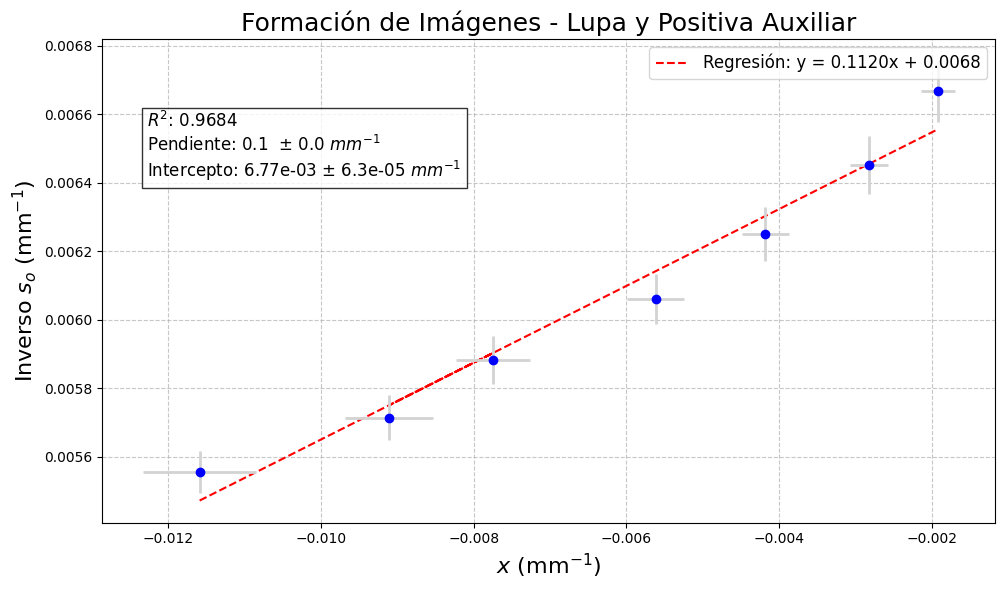

Pendiente (m): 0.11204 mm^-1
Intercepto (b): 0.0068 mm^-1
error en la pendiente: 0.0090 mm^-1
error en el intercepto: 0.0001 mm^-1
Coeficiente de determinación (R²): 0.9684
Distancia focal de la lente negativa f_l = -147.69 ± 1.37 mm


In [ ]:
# test d = ufloat(40,0) #ufloat(15,0)
# Separación entre lentes

d = ufloat(110.0, 1)  # mm

# distancia focal de la lente positiva auxiliar

f_plus = ufloat(146, 3)  # mm

# Transformaciones
x = (f_plus - si) / (d * (f_plus - si) + f_plus * si)
y = 1 / so
x_nom = unp.nominal_values(x)
y_nom = unp.nominal_values(y)
x_unc = unp.std_devs(x)
y_unc = unp.std_devs(y)

# Plotting
fig, ax = plot_template(
    title="Formación de Imágenes - Lupa y Positiva Auxiliar",
    x_label=r"$x$ (mm$^{-1}$)",
    y_label=r"Inverso $s_o$ (mm$^{-1}$)",
)

# # Añadir ejes
# ax.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
# ax.axvline(x=0, color="black", linestyle="-", linewidth=0.8)

# Ajuste lineal
r = stats.linregress(x_nom, y_nom)

slope, intercept, slope_err, u_intercept = (
    r.slope,
    r.intercept,
    r.stderr,
    r.intercept_stderr,
)

r_value = r.rvalue

# Graficar línea de regresión
ax.plot(
    x_nom,
    slope * x_nom + intercept,
    "r--",
    label=f"Regresión: y = {slope:.4f}x + {intercept:.4f}",
)

# Graficar puntos con incertidumbre
ax.errorbar(
    x_nom,
    y_nom,
    xerr=x_unc,
    yerr=y_unc,
    fmt="o",
    color="blue",
    ecolor="lightgray",
    elinewidth=2,
    capsize=0,
)

# Añadir texto con pendiente, intercepto y R²
ax.text(
    0.05,
    0.85,  # Posición en coordenadas relativas (x, y)
    f"$R^2$: {r_value**2:.4f}\nPendiente: {slope:.1f}  \u00B1 {slope_err:.1f} ${{mm}}^{{-1}}$\nIntercepto: {intercept:.2e} \u00B1 {u_intercept:.1e} ${{mm}}^{{-1}}$",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"),
)


# Añadir leyenda
ax.legend(fontsize=12)

plt.show()

# Cálculo de la distancia focal de la lente negativa
d_nom = unp.nominal_values(d)  # cm, separación entre lentes
f_plus_nom = unp.nominal_values(
    f_plus
)  # cm, distancia focal conocida de la lente positiva auxiliar


f_minus = -(1 / intercept)
# Propagación de incertidumbre para f_minus
# δf_minus = δintercept / intercept^2
delta_f_minus = u_intercept / intercept**2

print(f"Pendiente (m): {slope:.4f}4 mm^-1")
print(f"Intercepto (b): {intercept:.4f} mm^-1")
print(f"error en la pendiente: {slope_err:.4f} mm^-1")
print(f"error en el intercepto: {u_intercept:.4f} mm^-1")
print(f"Coeficiente de determinación (R²): {r_value**2:.4f}")
print(
    f"Distancia focal de la lente negativa f_l = {f_minus:.2f} ± {delta_f_minus:.2f} mm"
)

Se encontró que el foco de la lupa es de $f_l=-147.7 \pm 2$ debe ser el valor negativo del foco de la lente positiva. Este valor negativo obtenido para la lupa se puede explicar debido a que nuestro modelo no puede distinguir si la imagen virtual es producida por una lente positiva o por una lente negativa. Por lo tanto el foco de la lente positiva actuando como lupa es $f_l = 147.7 \pm 2$.


### Calculo de aumento medido

Dado que tenemos varios valores de la altura de la imagen $h_i$ y la altura del objeto $h_o$, se realizar un tratamiento estadístico de estos datos para obtener el aumento medido.


In [ ]:
# Cálculo de la magnificación

m = hi / ho

std_m = np.std(m, ddof=1)

m_mean = np.mean(m)

error = np.sqrt(std_m**2 + (0.1) ** 2)

m, m_mean, error

(array([8.17073171, 4.63414634, 5.48780488, 3.7804878 , 3.04878049,
        2.68292683, 2.31707317, 2.07317073]),
 4.024390243902439,
 2.046200258424862)

Obtenemos un valor de $m_t = 4.0 \pm 2$ cm.


### Parte III: Lupa


Se generan las mediciones a través del software de `tracker` a través de distintas imagenes tomadas con la cámara del celular. Las incertidumbres se toman a partir de la visibilidad del grosor de las lineas gruesas.


#### Tratamiento de los datos


Los parámetros serán los siguientes:

- `M`: Las magnificaciones $M$ medidas directamente.
- `s_o` : Distancia del objeto

Se hace estadística bajo la siguiente serie de datos:


C:\Users\pinzo\AppData\Local\Temp\ipykernel_29628\2763460494.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


2.096+/-0.023


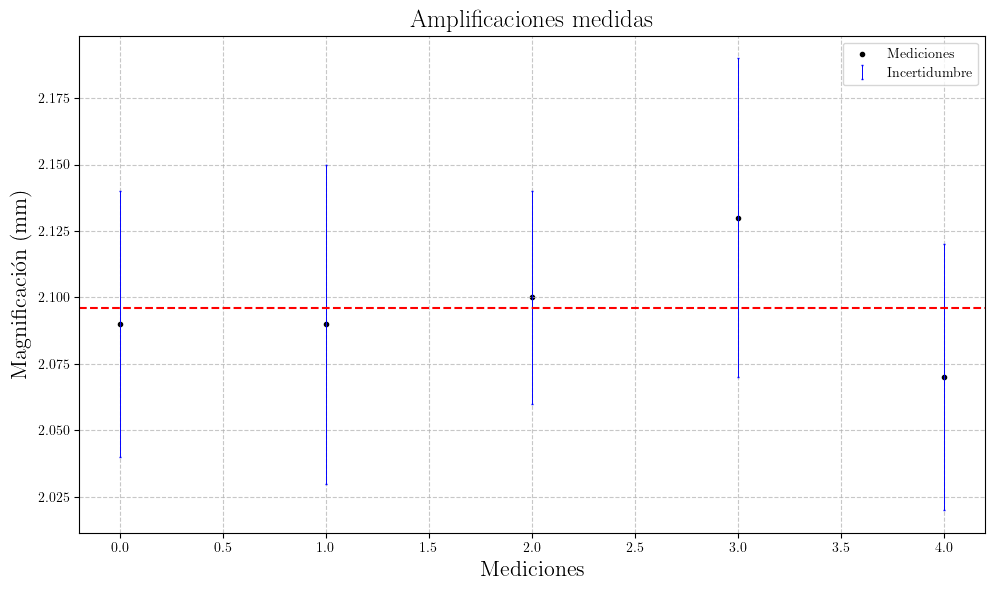

In [ ]:
# Magnificaciones
M = [
    ufloat(2.09, 0.05),
    ufloat(2.09, 0.06),
    ufloat(2.10, 0.04),
    ufloat(2.13, 0.06),
    ufloat(2.07, 0.05),
]  # mm
s_o = ufloat(80, 1)  # mm distancia del objeto

# separar valores
M_nominal = [m.nominal_value for m in M]
M_err = [m.std_dev for m in M]

# Graficar
# valores
x = range(0, len(M_nominal))
y = unp.nominal_values(M)


fig, ax = plot_template(
    title="Amplificaciones medidas", x_label="Mediciones", y_label="Magnificación (mm)"
)

ax.errorbar(
    x,
    M_nominal,
    yerr=M_err,
    label="Incertidumbre",
    linestyle="none",
    color="blue",
    capsize=1,
    capthick=1,
    lw=0.7,
)
ax.scatter(x, M_nominal, marker=".", color="black", label="Mediciones")
ax.axhline(y=np.mean(M_nominal), color="r", linestyle="--")
ax.legend()
fig.show()
print(np.mean(M))

# Conclusiones


### 3. Determinar la distancia focal de la lupa. El aumento medido y el aumento nominal en cuánto difieren. Explique por qué se tiene esta diferencia.


La lupa tiene una distancia focal equivalente a $f = 80 \, \text{mm}$, en el ejercicio previo (Parte II) no se generó el ejercicio con la misma lupa entonces no se pudo comparar efectivamente este foco.

Debido a la diferencia del aumento medido y aumento nominal difieren en el 32 % como se había indicado, con un aumento que difiere debido a la no idealidad tanto de la lupa según el fabricante, las aproximaciones y el uso de cámara externa.


### 4. ¿Qué ocurre cuando el objeto se coloca en el plano focal de la lupa y se observa la imagen virtual con el ojo para diferentes distancias (hasta acercarse a la lupa)?


Cuando se probó, a sugerencia del profesor, se observó que la visión no se dificultaba para enfocar a la imagen, a diferencia del objeto real que si presentaba dificultad. Esto se debe a que el objeto en el foco de la lupa, genera todos los rayos refractados paralelos (vease F. Optica Yobani) y la imagen se ve en el infinito, lo cual la retina no requiere enfocar nada.


### 5. Conclusiones finales


Se encontro que la lente auxiliar no tiene la informacion de como se esta generando la imagen que usa como imagen objeto, por que lo focos obtenidos para una lupa y una lente negativa son ambos negativos.

Se determinaron y se pueden comparar los focos de las mediciones de las lentes compuestas, lo cual nos permite obtener mediciones de una imagen virtual y caracterizar los lentes para futuras prácticas

A partir de la información proveida por la práctica de la lupa, se pudo estudiar las limitaciones de la lente como lupa ideal y verificar precisamente la amplificación como primer mecanismo óptico.


## Referencias

Mejía Barbosa, Y. (2020). Fundamentos de óptica : Curso introductorio. Universidad Nacional de Colombia. Facultad de Ciencias.

[David Manteallano - Sistema de dos lentes positivas](https://www.geogebra.org/m/S23Kf563)
